<a href="https://colab.research.google.com/github/Nikhitaa2329/genAI1/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
Random Forest - Mean Absolute Error: 0.3274252027374032
Random Forest - Mean Squared Error: 0.255169737347244


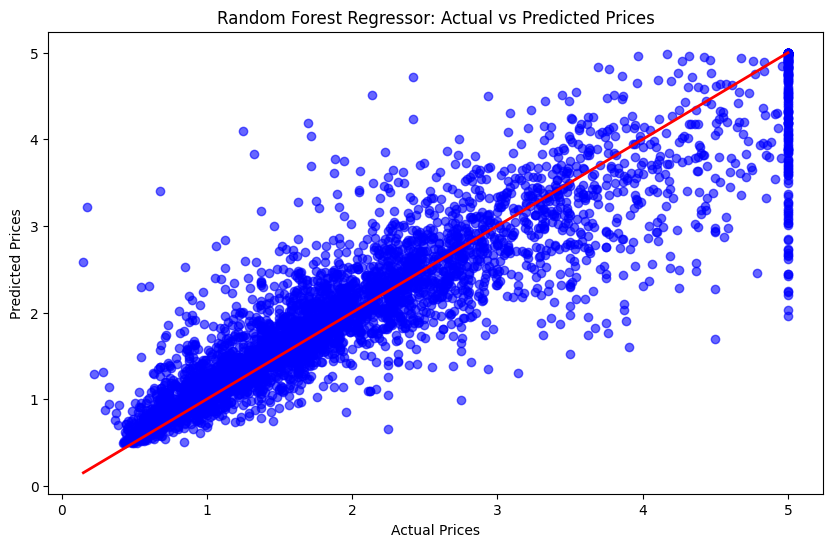

Enter the values for the following features:


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing()

# Convert to DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['Price'] = california.target  # Add target variable (Price)

# Preview the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Fill missing values if any, or drop rows/columns with missing data
data = data.dropna()

# Split the data into features (X) and target (y)
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale the features (important for certain models like Linear Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f'Random Forest - Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Random Forest - Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')

# Plot predictions vs actual values for the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regressor: Actual vs Predicted Prices')
plt.show()

# Function to make predictions based on user input
def predict_price():
    print("Enter the values for the following features:")
    feature_names = california.feature_names

    # Create a dictionary to store the user's input
    user_input = {}

    # Loop through the features and get input from the user
    for feature in feature_names:
        while True:
            try:
                user_input[feature] = float(input(f"{feature}: "))
                break
            except ValueError:
                print("Invalid input. Please enter a valid number.")

    # Convert the user input into a DataFrame to match the feature names
    user_input_df = pd.DataFrame([user_input])

    # Scale the user input using the same scaler that was used for training data
    user_input_scaled = scaler.transform(user_input_df)

    # Make the prediction using the trained Random Forest model
    predicted_price = rf_model.predict(user_input_scaled)

    # Display the predicted price
    print(f"The predicted house price is: ${predicted_price[0]:,.2f}")

# Call the function to make a prediction based on user input
predict_price()

